In [1]:
import pandas as pd

all_movies = pd.read_csv("movie_db.csv")

In [2]:
all_movies.head()

,Unnamed: 0,movieId,title,genres,year,userId,rating,timestamp,Synopsis
0,0,1,Toy Story,"['Adventure', 'Animation', 'Children', 'Comedy...",1995.0,2,3.5,1141415820,A cowboy doll is profoundly threatened and jea...
1,1,1,Toy Story,"['Adventure', 'Animation', 'Children', 'Comedy...",1995.0,3,4.0,1439472215,A cowboy doll is profoundly threatened and jea...
2,2,1,Toy Story,"['Adventure', 'Animation', 'Children', 'Comedy...",1995.0,4,3.0,1573944252,A cowboy doll is profoundly threatened and jea...
3,3,1,Toy Story,"['Adventure', 'Animation', 'Children', 'Comedy...",1995.0,5,4.0,858625949,A cowboy doll is profoundly threatened and jea...
4,4,1,Toy Story,"['Adventure', 'Animation', 'Children', 'Comedy...",1995.0,8,4.0,890492517,A cowboy doll is profoundly threatened and jea...


In [5]:
unique_id = all_movies.drop_duplicates('movieId')

In [10]:
unique_id = unique_id.drop(columns=["userId", "rating", "timestamp"])

In [48]:
#présence de films en double dans la base de donnée
print(unique_id["title"].value_counts()[:200])

Cinderella                        16
Hamlet                             9
First Love                         8
Misérables, Les                    8
Wuthering Heights                  8
                                  ..
Virus                              4
Hound of the Baskervilles, The     4
The Stranger                       4
Zero                               4
War and Peace                      4
Name: title, Length: 200, dtype: int64


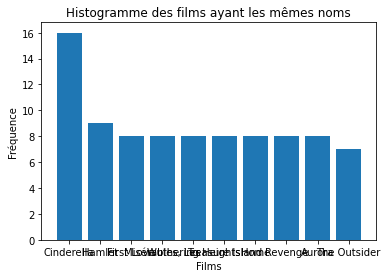

In [62]:
plt.bar(unique_id["title"].value_counts()[:10].index, unique_id["title"].value_counts()[:10])
plt.xlabel('Films')
plt.ylabel('Fréquence')
plt.title('Histogramme des films ayant les mêmes noms')
plt.show()


In [51]:
frequence = unique_id["Synopsis"].value_counts()

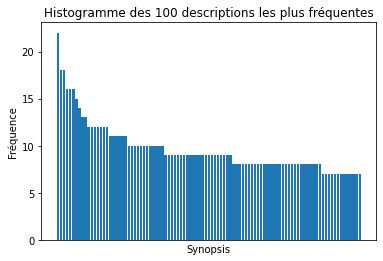

In [56]:
plt.bar(frequence[1:100].index, frequence[1:100])
plt.xlabel('Synopsis')
plt.ylabel('Fréquence')
plt.title('Histogramme des 100 descriptions les plus fréquentes')
plt.xticks([])
plt.show()


In [27]:
# pourcentage de films sans description 
nb_films = len(unique_id["Synopsis"])
freq_sans_desc = frequence.get("Description non disponible", 0)
print((freq_sans_desc/nb_films)*100)

12.34271004454079


Les films pour lesquels le scrapping a échoué ont eu un soucis car ils ont un titre au format suivant : Nom du film (Nom du film dans une autre langue) (ou nom alternatif du film)

Exemple de méthode pour mieux formater les noms de films

In [57]:
films_sans_synops = unique_id[unique_id["Synopsis"] == "Description non disponible"]

In [58]:
films_sans_synops["title"]

,movieId,title,genres,year,Synopsis
353117,29,"City of Lost Children, The (Cité des enfants p...","['Adventure', 'Drama', 'Fantasy', 'Mystery', '...",1995.0,Description non disponible
361422,30,Shanghai Triad (Yao a yao yao dao waipo qiao),"['Crime', 'Drama']",1995.0,Description non disponible
371694,32,Twelve Monkeys (a.k.a. 12 Monkeys),"['Mystery', 'Sci-Fi', 'Thriller']",1995.0,Description non disponible
529613,47,Seven (a.k.a. Se7en),"['Mystery', 'Thriller']",1995.0,Description non disponible
672532,59,"Confessional, The (Confessionnal, Le)","['Drama', 'Mystery']",1995.0,Description non disponible
...,...,...,...,...,...
25000059,209055,"Very Well, Thank You","['Comedy', 'Drama']",2007.0,Description non disponible
25000063,209067,Sousse: Marché aux charbons (avec chameaux),['Not specified'],1896.0,Description non disponible
25000079,209135,Jane B. by Agnès V.,"['Documentary', 'Fantasy']",1988.0,Description non disponible
25000081,209137,The Reward's Yours... The Man's Mine,['Western'],1969.0,Description non disponible


In [59]:
films_sans_synops["title"] = films_sans_synops["title"].str.replace(r'\s*\([^)]*\)', '')

/var/folders/3j/76tb4w1d76n4jkbznwrtv0tw0000gn/T/ipykernel_27386/1999332820.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  films_sans_synops["title"] = films_sans_synops["title"].str.replace(r'\s*\([^)]*\)', '')
/var/folders/3j/76tb4w1d76n4jkbznwrtv0tw0000gn/T/ipykernel_27386/1999332820.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  films_sans_synops["title"] = films_sans_synops["title"].str.replace(r'\s*\([^)]*\)', '')


In [60]:
films_sans_synops["title"]

353117                City of Lost Children, The
361422                            Shanghai Triad
371694                            Twelve Monkeys
529613                                     Seven
672532                         Confessional, The
                            ...                 
25000059                    Very Well, Thank You
25000063             Sousse: Marché aux charbons
25000079                     Jane B. by Agnès V.
25000081    The Reward's Yours... The Man's Mine
25000089                     Santosh Subramaniam
Name: title, Length: 7288, dtype: object